In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train= pd.read_csv('log/train.csv', parse_dates = ["activation_date"])
train_plt=train


In [4]:
test = pd.read_csv('log/test.csv', parse_dates = ["activation_date"])


# EDA

In [5]:
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [7]:
print ('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 1503424 rows and 18 columns
----------------------------
The test data has 508438 rows and 17 columns


In [8]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [9]:
#check feature types
train.dtypes


item_id                         object
user_id                         object
region                          object
city                            object
parent_category_name            object
category_name                   object
param_1                         object
param_2                         object
param_3                         object
title                           object
description                     object
price                          float64
item_seq_number                  int64
activation_date         datetime64[ns]
user_type                       object
image                           object
image_top_1                    float64
deal_probability               float64
dtype: object

In [26]:
#num_f=['price'.index, 'item_seq_number', 'activation_date', 'image_top_1', 'deal_probability']

num_f1=[[train.dtypes!= 'object'].index]
print (num_f)

[<built-in method index of str object at 0x000001F034395ED8>, 'item_seq_number', 'activation_date', 'image_top_1', 'deal_probability']


In [11]:
#check missing values
train.isnull().sum().sort_values(ascending=False)

param_3                 862565
param_2                 654542
description             116276
image                   112588
image_top_1             112588
price                    85362
param_1                  61576
category_name                0
user_id                      0
region                       0
city                         0
parent_category_name         0
deal_probability             0
title                        0
item_seq_number              0
activation_date              0
user_type                    0
item_id                      0
dtype: int64

In [15]:
# Let's check the percentage of missing values in our dataset

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['deal_probability'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)


,Total,Percent
param_3,862565,0.573734
param_2,654542,0.435368
description,116276,0.077341
image,112588,0.074888
image_top_1,112588,0.074888
price,85362,0.056778
param_1,61576,0.040957
category_name,0,0.000000
user_id,0,0.000000
region,0,0.000000


In [16]:
#target variable info

train['deal_probability'].describe()

count    1.503424e+06
mean     1.391306e-01
std      2.600785e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.508700e-01
max      1.000000e+00
Name: deal_probability, dtype: float64

C:\Users\Kathakali\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


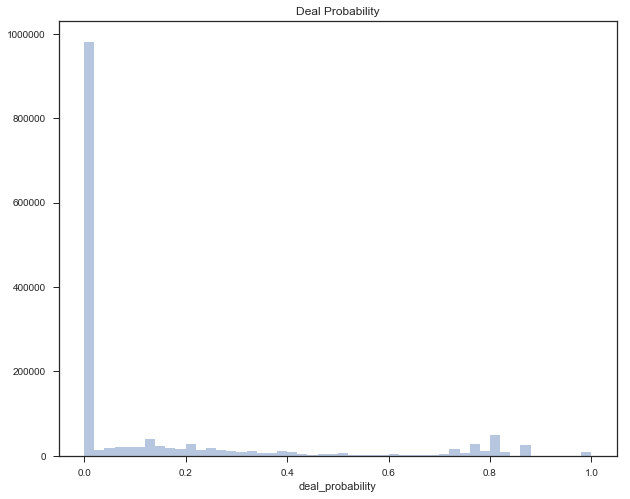

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(train.deal_probability.dropna(), kde= False)
plt.title("Deal Probability")
plt.show()

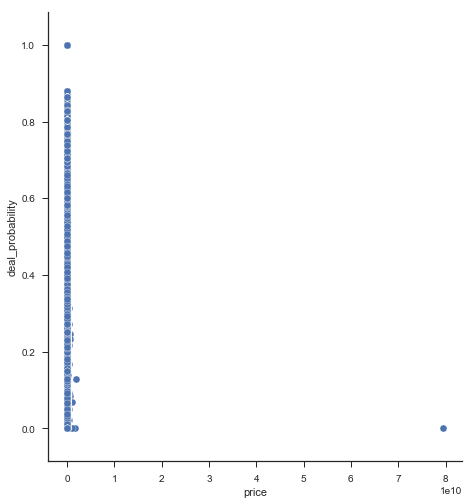

In [46]:
#plt.figure(figsize=(15,10))
g = sns.pairplot(train, x_vars=['price'], y_vars=['deal_probability'])
g.fig.set_size_inches(10,10)

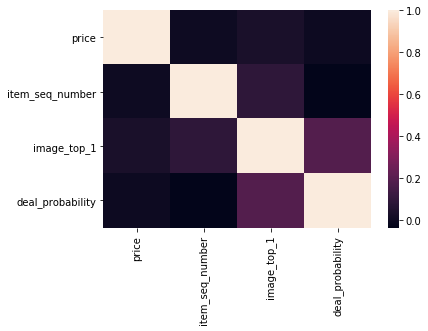

In [32]:
# Correlation heatmap
#numerical features
train_=train.drop(['user_id', 'item_id'], axis=1)
n_f=train_.dtypes[train.dtypes!= 'object'].index


corr=train_[n_f].corr()
sns.heatmap(corr)


In [35]:
print (corr['deal_probability'].sort_values(ascending=False), '\n') 


deal_probability    1.000000
image_top_1         0.189979
price              -0.001097
item_seq_number    -0.035744
Name: deal_probability, dtype: float64 



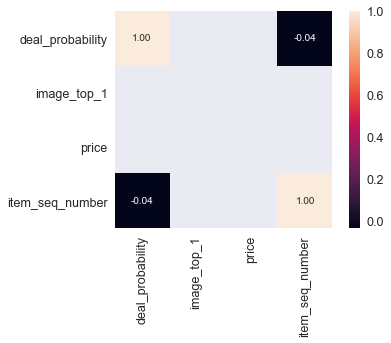

In [37]:
#target correlation matrix

k = 4 #number of variables for heatmap
cols = corr.nlargest(k, 'deal_probability')['deal_probability'].index
cm = np.corrcoef(train_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\Kathakali\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


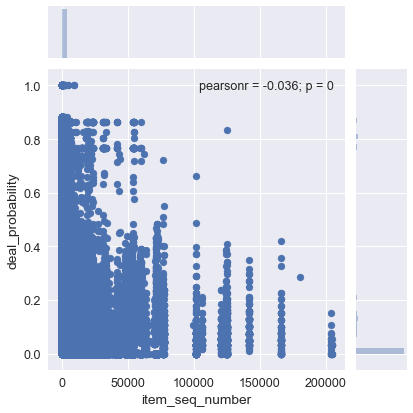

In [38]:
sns.jointplot(x=train_['item_seq_number'], y=train['deal_probability'])

C:\Users\Kathakali\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


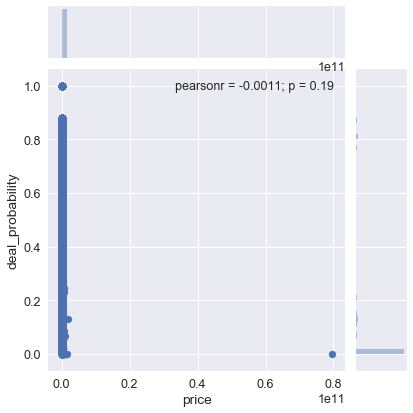

In [39]:
sns.jointplot(x=train_['price'], y=train['deal_probability'])

Correlation between Price and deal_probability: -0.0010972412435484346


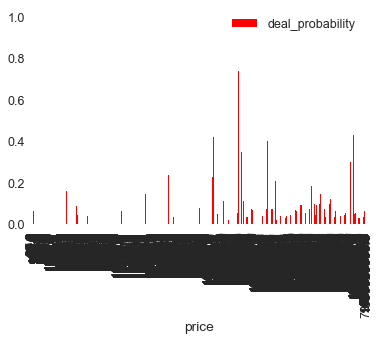

In [44]:
pivot = train_.pivot_table(index='price', values='deal_probability', aggfunc=np.median)
#pivot.sort_values(ascending=False)


pivot.plot(kind='bar', color='red')
print('Correlation between Price and deal_probability: {}'.format(corr['deal_probability']['price']))

C:\Users\Kathakali\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


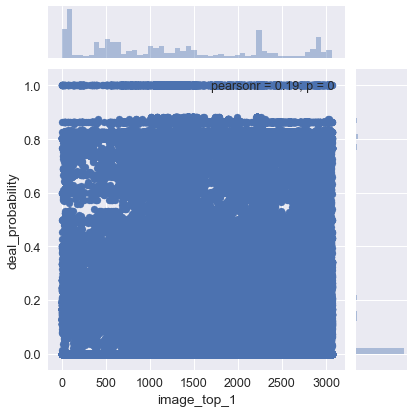

In [41]:
sns.jointplot(x=train_['image_top_1'], y=train['deal_probability'])

In [4]:
#categorical variables

train_=train.drop(['user_id', 'item_id'], axis=1)
c_f=train_.dtypes[train.dtypes=='object'].index

train_[c_f].describe()


,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,user_type,image
count,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1503424,1390836
unique,28,1733,9,47,371,271,1219,788377,1317102,3,1390836
top,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,Private,10835892e9cce2848e5005bdbe21db733622eb67a988c2...
freq,141416,63638,697623,282753,226289,150450,50615,15550,2249,1075706,1


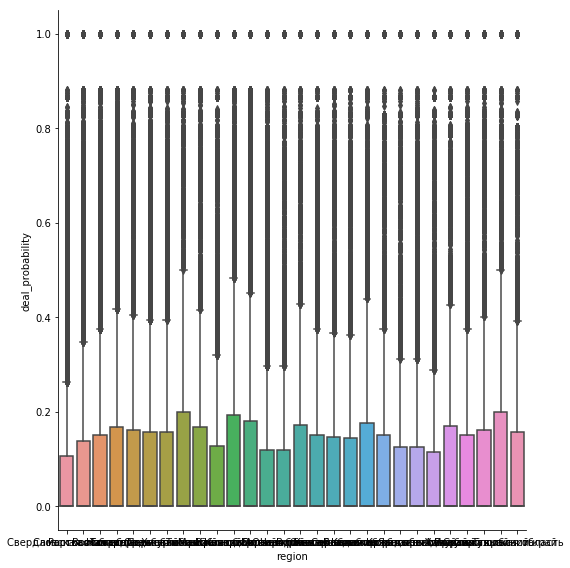

In [20]:
g=sns.factorplot(x='region', y='deal_probability', data =train, kind="box",size=8)
g

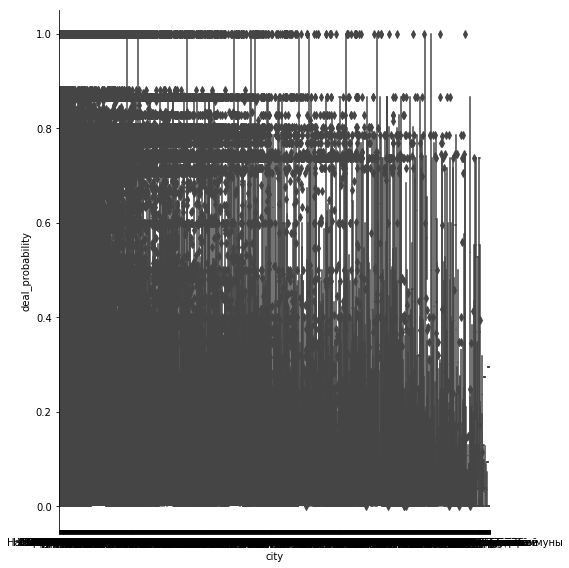

In [21]:
g=sns.factorplot(x='city', y='deal_probability', data =train, kind="box",size=8)
g

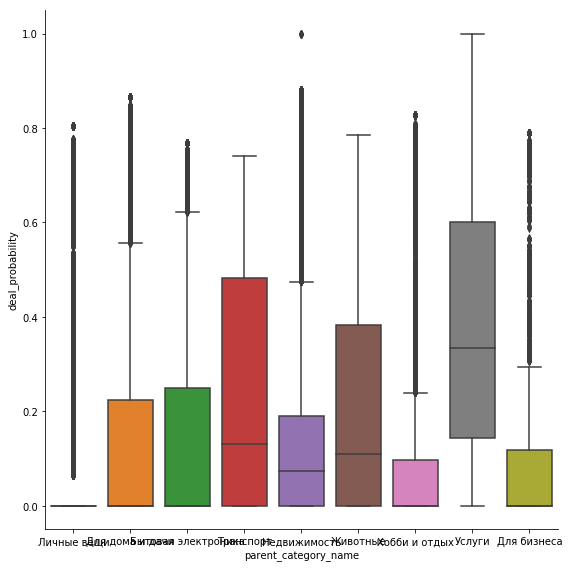

In [23]:
g=sns.factorplot(x='parent_category_name', y='deal_probability', data =train, kind="box",size=8)
g

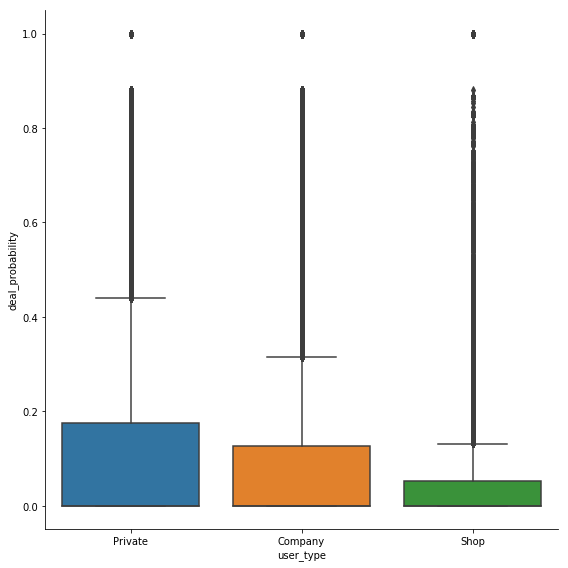

In [22]:
g=sns.factorplot(x='user_type', y='deal_probability', data =train, kind="box",size=8)
g

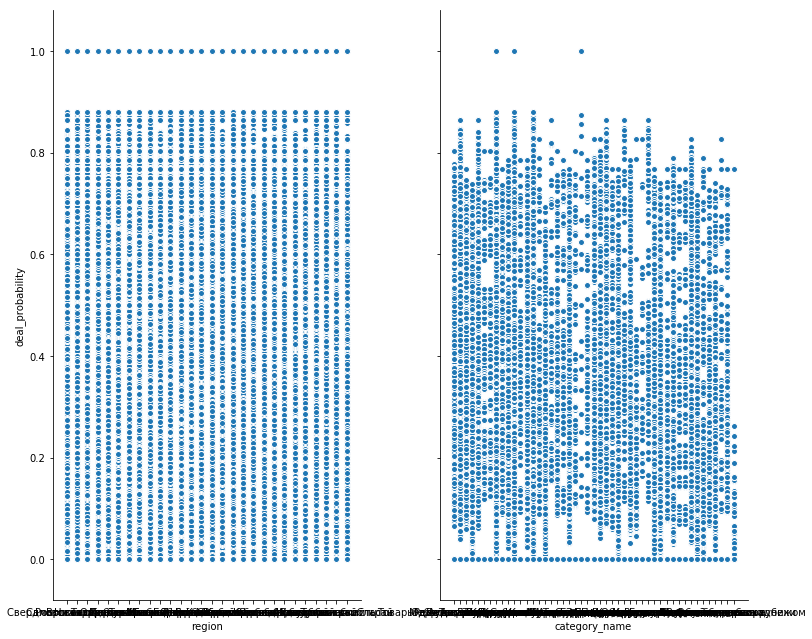

In [25]:
g = sns.pairplot(train, x_vars=['region', 'category_name'], y_vars=['deal_probability'])
g.fig.set_size_inches(12,12)

In [55]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='deal_probability ~ region', data=train).fit()

lm.params

Intercept                            0.136257
region[T.Башкортостан]               0.012602
region[T.Белгородская область]       0.009346
region[T.Владимирская область]       0.004730
region[T.Волгоградская область]      0.009651
region[T.Воронежская область]        0.004750
region[T.Иркутская область]          0.003421
region[T.Калининградская область]   -0.004683
region[T.Кемеровская область]       -0.000777
region[T.Краснодарский край]         0.010808
region[T.Красноярский край]         -0.015901
region[T.Нижегородская область]      0.010351
region[T.Новосибирская область]     -0.011568
region[T.Омская область]            -0.007072
region[T.Оренбургская область]       0.019664
region[T.Пермский край]              0.007428
region[T.Ростовская область]        -0.000313
region[T.Самарская область]          0.000464
region[T.Саратовская область]        0.009733
region[T.Свердловская область]      -0.014253
region[T.Ставропольский край]        0.017329
region[T.Татарстан]               

In [31]:
import statsmodels.formula.api as smf

sm = smf.ols(formula='deal_probability ~ user_type', data=train).fit()
sm.params

Intercept               0.124513
user_type[T.Private]    0.025045
user_type[T.Shop]      -0.061683
dtype: float64

In [33]:
sm = smf.ols(formula='deal_probability ~ category_name', data=train).fit()
sm.params

Intercept                                        0.278427
category_name[T.Аквариум]                       -0.094811
category_name[T.Аудио и видео]                  -0.106854
category_name[T.Билеты и путешествия]           -0.155714
category_name[T.Бытовая техника]                -0.025651
category_name[T.Велосипеды]                     -0.030854
category_name[T.Водный транспорт]               -0.048561
category_name[T.Гаражи и машиноместа]           -0.158988
category_name[T.Готовый бизнес]                 -0.178522
category_name[T.Грузовики и спецтехника]        -0.099946
category_name[T.Детская одежда и обувь]         -0.217592
category_name[T.Дома, дачи, коттеджи]           -0.153564
category_name[T.Другие животные]                -0.014376
category_name[T.Земельные участки]              -0.189750
category_name[T.Игры, приставки и программы]    -0.075804
category_name[T.Квартиры]                       -0.120273
category_name[T.Книги и журналы]                -0.237753
category_name[

In [34]:
sm = smf.ols(formula="""deal_probability ~ category_name
                                         +user_type+ category_name
                                         +param_1+param_2+param_3""", data=train).fit()
sm.params

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 65))



MemoryError: 

# cleaning

In [4]:
train["Weekday"] = train['activation_date'].dt.weekday
train["Weekend_no"] = train['activation_date'].dt.week
train["day"] = train['activation_date'].dt.day

test["Weekday"] = test['activation_date'].dt.weekday
test["Weekend_no"] = test['activation_date'].dt.week
test["day"] = test['activation_date'].dt.day

In [5]:
clean_train=train.drop(['item_id','user_id', 'title', 'description', 'image'], axis=1)
clean_train.shape


(1503424, 16)

In [6]:
clean_test=test.drop(['item_id','user_id', 'title', 'description', 'image'], axis=1)
clean_test.shape

(508438, 15)

In [7]:
#first label encode data

In [8]:
clean_train.dtypes

region                          object
city                            object
parent_category_name            object
category_name                   object
param_1                         object
param_2                         object
param_3                         object
price                          float64
item_seq_number                  int64
activation_date         datetime64[ns]
user_type                       object
image_top_1                    float64
deal_probability               float64
Weekday                          int64
Weekend_no                       int64
day                              int64
dtype: object

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data=clean_train

r2=le.fit_transform(data['region'].astype(str))
r3=le.fit_transform(data['city'].astype(str))
r4=le.fit_transform(data['parent_category_name'].astype(str))
r5=le.fit_transform(data['category_name'].astype(str))
r6=le.fit_transform(data['param_1'].astype(str))
r7=le.fit_transform(data['param_2'].astype(str))
r8=le.fit_transform(data['param_3'].astype(str))
#r8=le.fit_transform(data['price'].astype(str))
#r9=le.fit_transform(data['item_seq_number'].astype(str))
r9=le.fit_transform(data['activation_date'].astype(str))
r10=le.fit_transform(data['user_type'].astype(str))
r11=le.fit_transform(data['image_top_1'].astype(str))

In [8]:
clean_train['region']=r2
clean_train['city']=r3
clean_train['parent_category_name']=r4
clean_train['category_name']=r5
clean_train['param_1']=r6
clean_train['param_2']=r7
clean_train['param_3']=r8
clean_train['activation_date']=r9
clean_train['user_type']=r10
clean_train['image_top_1']=r11

In [9]:
clean_train.dtypes

region                    int64
city                      int64
parent_category_name      int64
category_name             int64
param_1                   int64
param_2                   int64
param_3                   int64
price                   float64
item_seq_number           int64
activation_date           int64
user_type                 int64
image_top_1               int64
deal_probability        float64
Weekday                   int64
Weekend_no                int64
day                       int64
dtype: object

In [14]:
deal=clean_train[['deal_probability']]
trainY=deal.astype(str)
print (trainY.shape)


(1503424, 1)


In [13]:
clean_train.drop('deal_probability', axis=1)

,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,activation_date,user_type,image_top_1,Weekday,Weekend_no,day
0,19,460,4,42,249,107,1162,400.0,2,13,1,12,1,13,28
1,17,1300,2,22,122,107,1162,3000.0,19,11,1,2721,6,12,26
2,16,1276,0,2,84,107,1162,4000.0,9,5,1,2259,0,12,20
3,21,940,4,42,38,107,1162,2200.0,286,10,0,2836,5,12,25
4,4,317,6,0,278,119,44,40000.0,3,1,1,1407,3,11,16
5,21,1657,4,42,38,107,1162,1300.0,9,13,1,2836,1,13,28
6,11,975,2,38,283,107,1162,11000.0,125,8,1,2026,3,12,23
7,15,1153,4,29,126,136,71,500.0,61,10,1,2583,5,12,25
8,14,1107,4,29,126,203,212,500.0,85,2,1,2415,4,11,17
9,11,975,4,10,105,193,70,400.0,136,7,0,2464,2,12,22


In [15]:
trainX=clean_train
trainX.shape

(1503424, 16)

# repeat cleaning with test

In [46]:
#new variables

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data2=clean_test

r22=le.fit_transform(data2['region'].astype(str))
r32=le.fit_transform(data2['city'].astype(str))
r42=le.fit_transform(data2['parent_category_name'].astype(str))
r52=le.fit_transform(data2['category_name'].astype(str))
r62=le.fit_transform(data2['param_1'].astype(str))
r72=le.fit_transform(data2['param_2'].astype(str))
r82=le.fit_transform(data2['param_3'].astype(str))
#r8=le.fit_transform(data['price'].astype(str))
#r9=le.fit_transform(data['item_seq_number'].astype(str))
r92=le.fit_transform(data2['activation_date'].astype(str))
r102=le.fit_transform(data2['user_type'].astype(str))
r112=le.fit_transform(data2['image_top_1'].astype(str))

In [17]:
clean_test['region']=r22
clean_test['city']=r32
clean_test['parent_category_name']=r42
clean_test['category_name']=r52
clean_test['param_1']=r62
clean_test['param_2']=r72
clean_test['param_3']=r82
clean_test['activation_date']=r92
clean_test['user_type']=r102
clean_test['image_top_1']=r112

In [18]:
clean_test.dtypes

region                    int64
city                      int64
parent_category_name      int64
category_name             int64
param_1                   int64
param_2                   int64
param_3                   int64
price                   float64
item_seq_number           int64
activation_date           int64
user_type                 int64
image_top_1               int64
Weekday                   int64
Weekend_no                int64
day                       int64
dtype: object

In [20]:
testX=clean_test

# handle missing data

In [21]:
trainX.isnull().sum()

region                      0
city                        0
parent_category_name        0
category_name               0
param_1                     0
param_2                     0
param_3                     0
price                   85362
item_seq_number             0
activation_date             0
user_type                   0
image_top_1                 0
deal_probability            0
Weekday                     0
Weekend_no                  0
day                         0
dtype: int64

In [22]:
trainY.isnull().sum()

deal_probability    0
dtype: int64

In [23]:
from sklearn.preprocessing import Imputer

mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer = mean_imputer.fit(trainX)
X_train= mean_imputer.transform(trainX.values)
xtrain=pd.DataFrame(X_train)
xtrain.columns=['region ','city','parent_category_name','category_name', 'param_1','param_2', 'param_3', 'price', 
                'item_seq_number', 'activation_date','user_type','image_top_1', 'deal_probability', 'weekday', 'weekend_no',
               'day']

In [24]:
xtrain.isnull().sum()

region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
price                   0
item_seq_number         0
activation_date         0
user_type               0
image_top_1             0
deal_probability        0
weekday                 0
weekend_no              0
day                     0
dtype: int64

In [25]:
from sklearn.preprocessing import Imputer

mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer = mean_imputer.fit(testX)
X_test= mean_imputer.transform(testX.values)
xtest=pd.DataFrame(X_train)
xtest.columns=['region ','city','parent_category_name','category_name', 'param_1','param_2', 'param_3', 'price', 
                'item_seq_number', 'activation_date','user_type','image_top_1', 'deal_probability', 'weekday', 'weekend_no',
               'day']

In [26]:
xtest.isnull().sum()

region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
price                   0
item_seq_number         0
activation_date         0
user_type               0
image_top_1             0
deal_probability        0
weekday                 0
weekend_no              0
day                     0
dtype: int64

# fit model

In [26]:
%%time
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

X=xtrain.iloc[:8000, :]
Y=trainY.iloc[:8000]
logreg.fit(X, Y)

Wall time: 3min 20s


In [30]:
%%time
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

X=xtrain.iloc[:10000, :]
Y=trainY.iloc[:10000]
logreg.fit(X, Y)

C:\Users\Kathakali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 5min 51s


In [33]:
%%time
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

X=xtrain.iloc[:12000, :]
Y=trainY.iloc[:12000]
logreg.fit(X, Y)

C:\Users\Kathakali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 9min 3s


In [ ]:
####not working with this volume
%%time
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

X=xtrain.iloc[:20000, :]
Y=trainY.iloc[:20000]
logreg.fit(X, Y)

In [29]:
%%time

x=xtest.iloc[:8000, :]
y= logreg.predict(x)

Wall time: 172 ms


In [31]:
%%time

x=xtest.iloc[:10000, :]
y= logreg.predict(x)

Wall time: 266 ms


In [34]:
%%time

x=xtest.iloc[:12000, :]
y= logreg.predict(x)

Wall time: 324 ms


In [31]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y, y)
print (" The test mse is:", mse)
print ("The test accuracy with logistic regression is:", (1-mse))

 The test mse is: 0.08896974033108751
The test accuracy with logistic regression is: 0.9110302596689125


In [32]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y, y)
print (" The test mse is:", mse)
print ("The test accuracy with logistic regression is:", (1-mse))

 The test mse is: 0.0883918515311
The test accuracy with logistic regression is: 0.9116081484689


In [35]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y, y)
print (" The test mse is:", mse)
print ("The test accuracy with logistic regression is:", (1-mse))

 The test mse is: 0.087550110814825
The test accuracy with logistic regression is: 0.912449889185175


# Abhinav

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

#X=xtrain
#Y=trainY
X=xtrain.iloc[:50000, :]
Y=trainY.iloc[:50000]
logreg.fit(X, Y)


In [ ]:
x=xtest.iloc[:50000,:]
y=logreg.predict(x)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y, y)
print (" The test mse is:", mse)
print ("The test accuracy is:", (1-mse))

# logregCv with l1 and l2 penalities - binary 

In [32]:
Y=trainY.iloc[:8000]
#print (Y)
#print (type(Y))
Y_train=Y
Y1_tr= Y_train.convert_objects(convert_numeric=True)
Y1=pd.DataFrame(Y1_tr)
#print (type(Y1_tr))
#print (Y1_tr.dtypes)
#print (Y1_tr.index.values)

C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [36]:
Y=trainY.iloc[:12000]
#print (Y)
#print (type(Y))
Y_train=Y
Y1_tr= Y_train.convert_objects(convert_numeric=True)
Y1=pd.DataFrame(Y1_tr)
#print (type(Y1_tr))
#print (Y1_tr.dtypes)
#print (Y1_tr.index.values)

C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [54]:
avg= Y1_tr.mean()
Avg=avg.astype(str)
print (type(Avg))

for idx,row in Y1.iterrows():
    
    if (row.deal_probability <=Avg):
        #Y1.set_value(idx, 'class', 0)
        Y1['class']=0
    else:
        Y1.set_value(idx, 'class', 1)
        

<class 'pandas.core.series.Series'>


TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

In [34]:
y1=Y1['class']   #target for logregCV


In [38]:
#l1 penalized logreg
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(X)
l1_lr= LogisticRegressionCV(Cs=10, penalty='l1', solver='liblinear')
l1_lr.fit(X1,y1)
y_l1=l1_lr.predict(x)
mse_l1= mean_squared_error(y1, y_l1)
print ("The test mse is:", mse_l1)
print ("The test accuracy with L1 penalized logistic regression is:", (1-mse_l1))

 The test mse is: 0.056
The test accuracy with L1 penalized logistic regression is: 0.944


In [39]:
l2_lr= LogisticRegressionCV(Cs=10, penalty='l2', solver='sag')

X2 = StandardScaler().fit_transform(X)
l2_lr.fit(X2,y1)
y_l2=l2_lr.predict(x)
mse_l2= mean_squared_error(y1, y_l2)
print (" The test mse is:", mse_l2)
print ("The test accuracy with L1 penalized logistic regression is:", (1-mse_l2))

C:\Users\Kathakali\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 The test mse is: 0.335125
The test accuracy with L1 penalized logistic regression is: 0.664875


# multiclass using NB multinomial

In [40]:
Y1_tr= Y_train.convert_objects(convert_numeric=True)
Y1=pd.DataFrame(Y1_tr)
avg= Y1_tr.mean()

avg1=((avg-Y1_tr.min())/2).astype(float)

avg2=((Y1_tr.max()-avg)/2).astype(float)

#clsas1 = 0 to avg1
#class 2 =avg1 to avg
#class3 =avg to avg2
#class4 =avg2 to 1
for idx,row in Y1.iterrows():
    val=row['deal_probability']
    if (0<=val <=avg1):
        Y1.set_value(idx, 'class', 1)
    elif (avg1<val <=avg):
        Y1.set_value(idx, 'class', 2)
    elif(avg <val <=avg2):
        Y1.set_value(idx, 'class', 3)
    elif(avg2<val <=1):
        Y1.set_value(idx, 'class', 4)

C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\Kathakali\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kathakali\Anac

In [41]:
y1_gb=Y1['class']

In [185]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y1_gb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [186]:
y_mb=clf.predict(x)

In [187]:
mse_mb= mean_squared_error(y1_gb, y_mb)
print (" The test mse is:", mse_mb)

 The test mse is: 5.770166666666666
